# Template Matching!

## This process is not scale invariant, the template image must be of the same scale as the objects of interest. 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# loading the template and the image I'm targeting!
img_rgb = cv2.imread('images/f16.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) ## as a gray image
template = cv2.imread('images/f16_template.jpg', 0) ## as a gray image
h, w = template.shape[::] 

## Here looking for a single match!

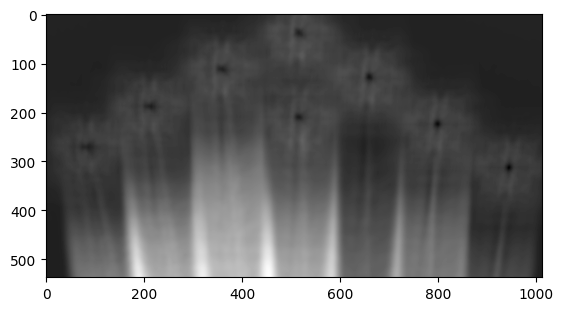

In [4]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF) # For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# There are many statistics used for the matching! here the min squeared difference
# in res, each pixel is the result ot the aggregation over the template
plt.imshow(res, cmap='gray')
plt.show()

### the minumum value is my target!

In [5]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

Let's extract the top left and the bottom right to draw the bounding box!

In [6]:
top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 


array([[64, 64, 64, ..., 62, 62, 62],
       [64, 64, 64, ..., 62, 62, 62],
       [64, 64, 64, ..., 62, 62, 62],
       ...,
       [80, 80, 80, ..., 79, 79, 79],
       [81, 81, 80, ..., 79, 79, 79],
       [81, 81, 81, ..., 79, 79, 79]], dtype=uint8)

In [9]:
cv2.imshow("Matched image", img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

: 

## Let's perform the same but for multiple classes!

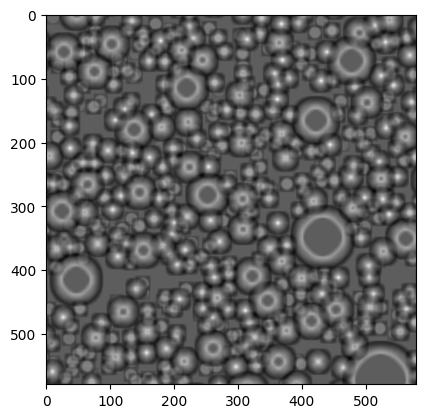

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('images/bubbles.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/bubbles_template.png',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) #this returns a value of prob that a box starts in that pixel
plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)   # this returns 2 arraty
# loc[::-1] reverse the elements of an array!

In [7]:
for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  #Red rectangles with thickness 2. 

#cv2.imwrite('images/template_matched.jpg', img_rgb)
cv2.imshow("Matched image", img_rgb)
cv2.waitKey()

cv2.destroyAllWindows()

: 